In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("datasets/weight-height.csv")

data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
#preprocess
data["Height"] = data["Height"] * 2.54
data["Weight"] = data["Weight"] / 2.205
data = data.replace(["Male", "Female"], [1,0])

data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

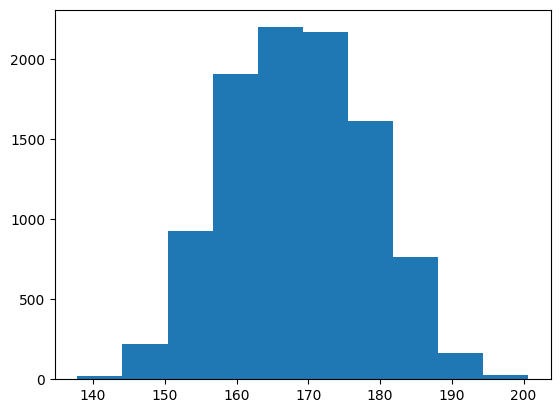

In [12]:
plt.hist(data["Height"])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <BarContainer object of 10 artists>)

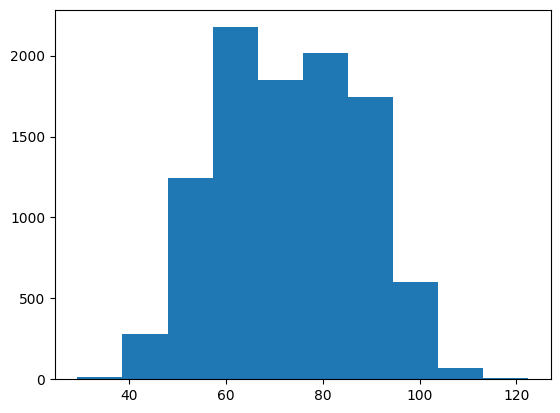

In [13]:
plt.hist(data["Weight"])

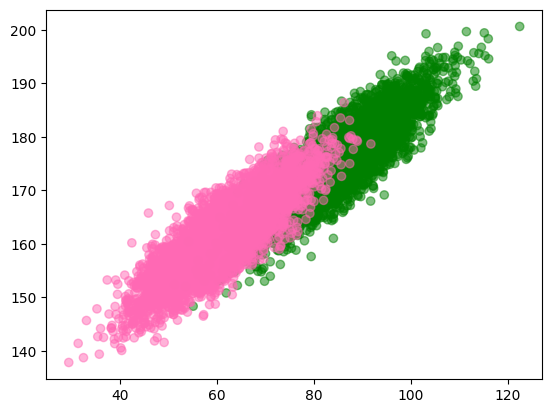

In [14]:
colors = ["hotpink","green"]

plt.scatter(data["Weight"], data["Height"] , c=data["Gender"], cmap=ListedColormap(colors), alpha=0.5)

In [15]:
X_train = np.array([data["Weight"], data["Height"]]).T
X_train.shape


Y_train = np.array(data["Gender"])
Y_train.shape

(10000,)

In [16]:
class KNearestNeighbours:
    def __init__(self, k):
        self.k = k

# train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    

    def eucilidianDistance(self, a, b):
        d = np.sqrt(np.sum((a - b) ** 2))
        return d
    

    def nearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
            dist = self.eucilidianDistance(x_train, X_test)
            dists.append(dist)
        
        index_sorted= np.argsort(dists)

        gender_sorted = self.Y_train[index_sorted]

        return gender_sorted[0:self.k]

    def evaluate(self, X_test, Y_test):
        KNNpredicts = []
        for test in X_test:
            KNNpredicts.append(self.predict(test))
        correct = 0
        for i in range(len(X_test)):
            if KNNpredicts[i] == Y_test[i]:
                correct +=1
        return correct/len(Y_test)
    
# test
    def predict(self, X_test):
        
        neighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(neighbors))

        return Y_test

In [17]:
knn = KNearestNeighbours(k=15)
knn.fit(X_train, Y_train)


X_test = np.array([158, 48])
answer = knn.predict(X_test)
answer

1

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.01, random_state=42)
len(x_test)

100

In [19]:
knn.evaluate(x_test, y_test)

0.91

In [20]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [21]:
pred = neigh.predict(x_test)
len(pred)

100

In [22]:
eval = (pred == y_test).sum()/len(y_test)
eval

0.91